 # House price prediction with 3 popular algorithm
 - Random Forest
 - xgboost
 - xgboost

**1) Random Forest**

Load Libraries

In [104]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [99]:
df = pd.read_csv('../input/dataset/house/train.csv')

In [102]:
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

In [111]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# print(x)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [ ]:
def drop_not_used_columns(df):
    df.drop('Id', axis=1, inplace=True)
    # df.drop('SalePrice', axis=1, inplace=True)
    
    return df
    

In [29]:
df = drop_not_used_columns(df)

In [30]:
def fill_na_enum_cols(df):
    for col in df.columns:
        if df[col].dtype == 'object' and df[col].isna().any():
            df[col] = df[col].fillna(df[col].mode()[0])
    return df

In [31]:
def fill_na_val_cols(df):
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
    df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].median())
    df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["GarageYrBlt"].median())
    
    return df


In [32]:
df = fill_na_val_cols(df)

In [33]:
df = fill_na_enum_cols(df)

In [77]:
# df.head()

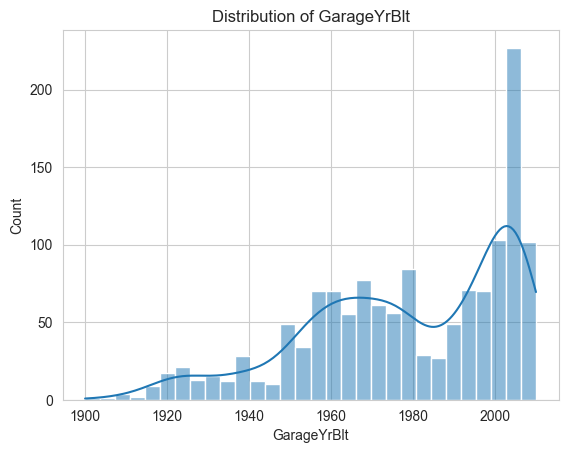

In [215]:
sns.histplot(df['GarageYrBlt'], bins=30, kde=True)
plt.title("Distribution of GarageYrBlt")
plt.show()

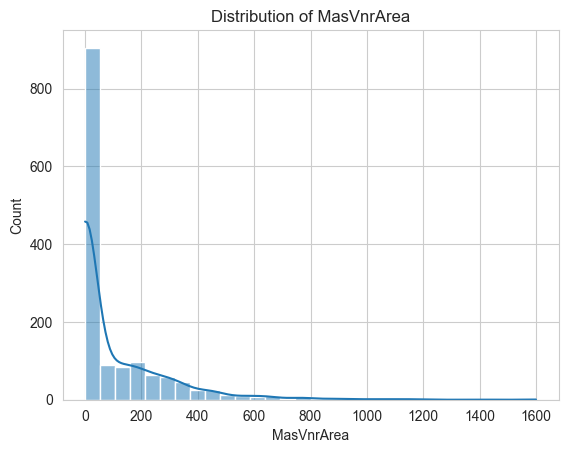

In [212]:
sns.histplot(df['MasVnrArea'], bins=30, kde=True)
plt.title("Distribution of MasVnrArea")
plt.show()

In [196]:
df["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

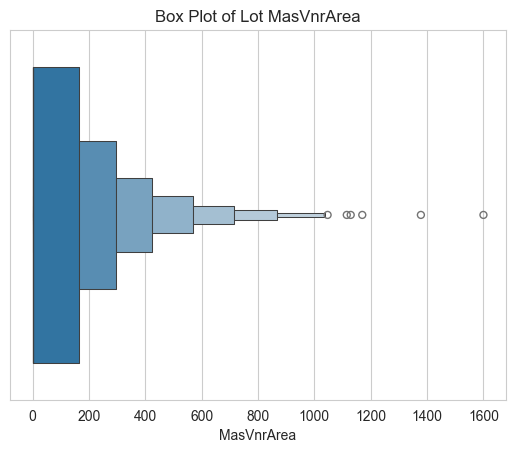

In [213]:
sns.boxenplot(x=df["MasVnrArea"])
plt.title("Box Plot of Lot MasVnrArea")
plt.show()

In [210]:
print("Mean :", df["LotFrontage"].mean())
print("Mode :", df["LotFrontage"].mode()[0])
print("Median :", df["LotFrontage"].median())

Mean : 70.04995836802665
Mode : 60.0
Median : 69.0


In [35]:
df.shape

(1460, 79)

**Starting Encoding**

(i) Label Encoding

In [ ]:

cat_cols = ["Street", "Alley", "Utilities", "LotConfig", "Neighborhood","RoofMatl","Exterior1st",
            "Exterior2nd", "MasVnrType", "Heating","CentralAir", "Electrical", "GarageType",
            "PavedDrive", "MiscFeature"]
target_encoder = ce.TargetEncoder()

for col in cat_cols:
    print(df[col].dtype)
    df[col] = df[col].astype(str)
    
    if df[col].nunique() > 3 :
        df[col] = target_encoder.fit_transform(df[col])
    else:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    

object


(ii) Ordinal Encoding

In [ ]:
ord_cat_cols = ["LotShape", "LandContour",  "SaleCondition","Condition1", "Condition2",
                "LandSlope", "Utilities", "BldgType", "HouseStyle","RoofStyle", "ExterQual","ExterCond",
                "GarageQual", "GarageCond","BsmtQual", "BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                "HeatingQC", "KitchenQual", "FireplaceQu", "Functional", "GarageFinish", "PoolQC", "Fence",
                "SaleType", "SaleCondition"]
ordinal_encoder = OrdinalEncoder()
for col in ord_cat_cols:
    df[col] = df[col].astype(str)
    df[col] = ordinal_encoder.fit_transform(df[col])

(iii) One Hot Encoder

In [95]:
hot_cols = ["Foundation"]
# hot_cols = ["Foundation", "MSZoning"]
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
for col in hot_cols:
    print(col)
    df[col] = df[col].astype(str)
    df[col] = df[col].map({'PConc':1, 'CBlock':2, 'BrkTil':3, 'Wood':4, 'Slab':5, 'Stone':7})
    
    # df[col] = one_hot_encoder.fit_transform(df[col])
    # df[col] = one_hot_encoder.fit_transform(df[col])

Foundation


In [93]:
df["Foundation"].unique()
# df[["Foundation"]].unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

In [96]:
df["Foundation"].unique()


array([1, 2, 3, 4, 5, 7])

In [48]:
# object_cols = df.select_dtypes(include='object').columns
object_cols = df.select_dtypes(include='object')

In [ ]:

cols = []
df_summary =pd.DataFrame({
    'Column':cols,
    'Unique Count': [df[col].nunique() for col in cols],
    'Unique Values' : [df[col].unique() if df[col].nunique() <= 6 else 'more than 5 values' for col in cols]
    # columns
    # columns=cols,
    
})

In [71]:
df_summary

,Column,Unique Count,Unique Values
0,MSZoning,5,"[RL, RM, C (all), FV, RH]"
1,Street,2,"[Pave, Grvl]"
2,Alley,2,"[Grvl, Pave]"
3,LotShape,4,"[Reg, IR1, IR2, IR3]"
4,LandContour,4,"[Lvl, Bnk, Low, HLS]"
5,Utilities,2,"[AllPub, NoSeWa]"
6,LotConfig,5,"[Inside, FR2, Corner, CulDSac, FR3]"
7,LandSlope,3,"[Gtl, Mod, Sev]"
8,Neighborhood,25,more than 5 values
9,Condition1,9,more than 5 values


In [ ]:
# map_categories = [""]
# for col in map_categories:
#     df[col] = df[col].map({
#         'AllPub' :1,
#         'NoSeWa' :0
#     })

In [57]:
print(len(cols))

43


Histogram of Sale Price

In [81]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


**(2) xgboost**

**(3) lgboost**